In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from time import time
import logging

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [81]:
a = pd.read_pickle('shear_rate_0k')
b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=a
for i in [b,c,d,e,f,g,h]:
    X=X.append(i)

In [82]:
for i in [a,b,c,d,e,f,g,h]:
    print(i.shape)

(296, 6)
(589, 6)
(44, 6)
(66, 6)
(411, 6)
(979, 6)
(586, 6)
(2596, 6)


In [83]:
y = X[['shear rate']].values.ravel()
print(y)
X=X.drop(columns=['shear rate'])
print(X)

[    0.     0.     0. ... 90000. 90000. 90000.]
      eccentricity  convex_area  major_axis_length  minor_axis_length  \
0         0.825802         31.0           8.134746           4.587675   
1         0.805504         53.0          10.428318           6.179722   
2         0.837421         28.0           7.793800           4.259762   
3         0.802286         31.0           7.839319           4.679603   
4         0.861723         31.0           8.306929           4.214755   
5         0.892727         22.0           7.595454           3.422503   
6         0.876329         44.0          10.282629           4.953271   
7         0.891431         61.0          12.527890           5.677103   
8         0.861284         40.0           9.533924           4.844416   
9         0.832255        332.0          26.420877          14.647565   
10        0.800265         48.0           9.788423           5.869591   
11        0.837300        238.0          22.847365          12.491647   
12 

In [84]:
y.shape

(5567,)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [86]:
print(X_train)

      eccentricity  convex_area  major_axis_length  minor_axis_length  \
1092      0.905070        119.0          18.330853           7.795430   
289       0.940246         61.0          14.082384           4.795000   
441       0.926173        421.0          35.024847          13.207819   
2307      0.934172         69.0          15.823533           5.646210   
1927      0.912538         42.0          11.050412           4.519536   
481       0.886487         24.0           7.723006           3.573850   
346       0.972917         50.0          16.464599           3.805901   
23        0.922084         46.0          11.924907           4.614823   
775       0.902554         35.0           9.887754           4.257442   
2071      0.907272         52.0          12.296468           5.171200   
1210      0.953362         70.0          16.667375           5.030692   
870       0.910679         30.0           9.236043           3.815540   
26        0.866831         63.0          12.123203 

In [ ]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


Predicting shear rate on the test set
done in 0.094s


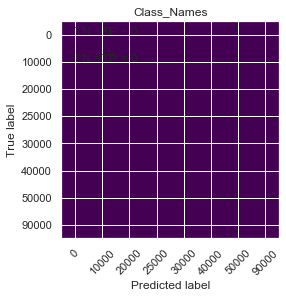

In [71]:
print("Predicting shear rate on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

shear_rate = np.array([0,10000,20000,25000,30000,40000,50000,90000])
n_classes = shear_rate.shape[0]

print(classification_report(y_test, y_pred, target_names=str(shear_rate)))


cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(shear_rate))
plt.xticks(tick_marks, shear_rate, rotation=45)
plt.yticks(tick_marks, shear_rate)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [46]:
# find PCA components
from sklearn.preprocessing import normalize

X = normalize(X)
print(X)
pca = PCA(n_components=2)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

[[-0.70852717  0.01144989  0.68773111  0.14282972  0.06695072 -0.00115407]
 [ 0.11806438 -0.11115842  0.33612569 -0.84714118 -0.37638497  0.03755405]]
[0.10023107 0.00041258]


In [37]:
# Compute a PCA on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 2

print("Extracting the top %d stretched_molecules from %d molecules"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 6 stretched_molecules from 4175 molecules
done in 0.005s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.002s


In [38]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 57.992s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [40]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=shear_rate))


cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.show()


Predicting people's names on the test set
done in 0.049s


TypeError: object of type 'numpy.int32' has no len()

In [70]:
# apply t-SNE
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(5567, 2)